In [1]:
import pandas as pd
import numpy as np

# --- 1. SETUP: Create Dummy Data with Missing Values ---
data = {
    'employee_id': range(101, 111),
    'job_title': ['Intern', 'Intern', 'Intern', 'Intern', 'Manager', 'Manager', 'Manager', 'Executive', 'Executive', 'Executive'],
    'salary': [30000, np.nan, 32000, np.nan, 90000, 92000, np.nan, 200000, np.nan, 210000]
}
df = pd.DataFrame(data)

print("--- Original Data (Note the NaNs) ---")
print(df)
print("\n")

# --- 2. THE CALCULATION: Calculate Means by Group ---
# We need the average for Interns, Managers, and Execs separately.
# The .transform('mean') function is a lifesaver here—it returns a Series 
# aligned with the original dataframe, but with the group mean in every row.
df['group_avg_salary'] = df.groupby('job_title')['salary'].transform('mean')


# --- 3. THE CHALLENGE: Smart Imputation with np.where ---
# Logic: IF salary is missing (np.nan), USE group_avg_salary. OTHERWISE, keep original salary.
# Hint: Use df['salary'].isna() as your condition.

# <YOUR CODE HERE>
df['salary_clean'] = np.where(df['salary'].isna(), df['group_avg_salary'], df['salary'])


# --- 4. CHECK RESULTS ---
print("--- Cleaned Data ---")
print(df[['job_title', 'salary', 'group_avg_salary', 'salary_clean']])

# Verify: Did the Intern (Row 1) get 31,000? Did the Exec (Row 8) get 205,000?

--- Original Data (Note the NaNs) ---
   employee_id  job_title    salary
0          101     Intern   30000.0
1          102     Intern       NaN
2          103     Intern   32000.0
3          104     Intern       NaN
4          105    Manager   90000.0
5          106    Manager   92000.0
6          107    Manager       NaN
7          108  Executive  200000.0
8          109  Executive       NaN
9          110  Executive  210000.0


--- Cleaned Data ---
   job_title    salary  group_avg_salary  salary_clean
0     Intern   30000.0           31000.0       30000.0
1     Intern       NaN           31000.0       31000.0
2     Intern   32000.0           31000.0       32000.0
3     Intern       NaN           31000.0       31000.0
4    Manager   90000.0           91000.0       90000.0
5    Manager   92000.0           91000.0       92000.0
6    Manager       NaN           91000.0       91000.0
7  Executive  200000.0          205000.0      200000.0
8  Executive       NaN          205000.0      20

In [2]:
df.head()

,employee_id,job_title,salary,group_avg_salary,salary_clean
0,101,Intern,30000.0,31000.0,30000.0
1,102,Intern,NaN,31000.0,31000.0
2,103,Intern,32000.0,31000.0,32000.0
3,104,Intern,NaN,31000.0,31000.0
4,105,Manager,90000.0,91000.0,90000.0


In [1]:
import pandas as pd

# 1. Setup Data
df = pd.DataFrame({
    'title': ['Intern', 'Intern', 'Manager', 'Intern', 'Manager'],
    'salary': [30000, 32000, 90000, 31000, 92000]
})

print("--- 1. Original DataFrame (5 rows) ---")
print(df)

# 2. Standard Groupby (The Shrink)
# This returns a Series with only 2 rows (one for each unique title)
grouped_means = df.groupby('title')['salary'].mean()

print("\n--- 2. Standard Groupby (Returns 2 rows) ---")
print(grouped_means)
print("See? We lost the individual rows. We can't paste this directly into 'df'.")

# 3. Transform (The Broadcast)
# This calculates the SAME means, but repeats them for every row that matches the group.
# It returns a Series with 5 rows (matching the original df).
df['group_avg'] = df.groupby('title')['salary'].transform('mean')

print("\n--- 3. Transform Result (Returns 5 rows) ---")
print(df)
print("See? Every 'Intern' row now knows the 'Intern Average' (31000).")

--- 1. Original DataFrame (5 rows) ---
     title  salary
0   Intern   30000
1   Intern   32000
2  Manager   90000
3   Intern   31000
4  Manager   92000

--- 2. Standard Groupby (Returns 2 rows) ---
title
Intern     31000.0
Manager    91000.0
Name: salary, dtype: float64
See? We lost the individual rows. We can't paste this directly into 'df'.

--- 3. Transform Result (Returns 5 rows) ---
     title  salary  group_avg
0   Intern   30000    31000.0
1   Intern   32000    31000.0
2  Manager   90000    91000.0
3   Intern   31000    31000.0
4  Manager   92000    91000.0
See? Every 'Intern' row now knows the 'Intern Average' (31000).


In [2]:
import pandas as pd
import numpy as np

# --- 1. SETUP: Create Dummy Sales Data ---
data = {
    'rep_id': [1, 2, 3, 4, 5, 6],
    'region': ['NY', 'NY', 'NY', 'Idaho', 'Idaho', 'Idaho'],
    'sales': [100000, 120000, 80000,  # NY Reps (High Volume)
              10000,  12000,  8000]   # Idaho Reps (Low Volume)
}
df = pd.DataFrame(data)

print("--- Original Data ---")
print(df)


# --- 2. THE CALCULATION: Z-Score by Group ---
# We need to calculate (Sales - Region_Mean) / Region_Std
# We use .transform() twice: once for mean, once for std.

# Step A: Get the Mean per Region (Broadcasted)
df['region_mean'] = df.groupby('region')['sales'].transform('mean')

# Step B: Get the Std Dev per Region (Broadcasted)
df['region_std'] = df.groupby('region')['sales'].transform('std')


# --- 3. THE METRIC: Calculate Z-Score ---
# Formula: (Value - Mean) / Std
df['performance_score'] = (df['sales'] - df['region_mean']) / df['region_std']


# --- 4. CHECK RESULTS ---
print("\n--- Scored Data ---")
print(df[['rep_id', 'region', 'sales', 'performance_score']])

# --- 5. ANALYSIS ---
# Look at Rep 1 (NY, $100k) vs Rep 4 (Idaho, $10k).
# They have vastly different sales numbers, but...
# Their 'performance_score' should be IDENTICAL (0.0).
# Why? Because they are both exactly average for their respective regions.

--- Original Data ---
   rep_id region   sales
0       1     NY  100000
1       2     NY  120000
2       3     NY   80000
3       4  Idaho   10000
4       5  Idaho   12000
5       6  Idaho    8000

--- Scored Data ---
   rep_id region   sales  performance_score
0       1     NY  100000                0.0
1       2     NY  120000                1.0
2       3     NY   80000               -1.0
3       4  Idaho   10000                0.0
4       5  Idaho   12000                1.0
5       6  Idaho    8000               -1.0


In [ ]:
import pandas as pd
import numpy as np

# --- 1. SETUP: The "Dirty" Data ---
data = {
    'user_id': range(1, 13),
    'region': ['NA', 'NA', 'NA', 'NA', 'EU', 'EU', 'EU', 'EU', 'APAC', 'APAC', 'APAC', 'APAC'],
    'segment': ['Enterprise', 'SMB', 'SMB', 'SMB', 'Enterprise', 'Enterprise', 'SMB', 'SMB', 'Enterprise', 'SMB', 'SMB', 'SMB'],
    # Note: NA users are generally happier. APAC is harsher.
    'csat_score': [9.0, np.nan, 8.5, 9.2,  # NA
                   7.0, 7.5, np.nan, 6.5,  # EU
                   np.nan, 4.0, 5.0, 4.5]  # APAC
}
df = pd.DataFrame(data)

print("--- Step 0: Raw Data ---")
print(df)


# --- TASK 1: Smart Imputation ---
# Goal: Fill missing 'csat_score' with the AVERAGE of that user's 'region'.
# Hint: Use .groupby().transform('mean') first.

# TODO: Calculate 'region_avg' column
# <YOUR CODE HERE>
df['region_avg'] = df.groupby('region')['csat_score'].transform('mean')

# TODO: Create 'csat_clean' by filling NaNs in 'csat_score' with 'region_avg'
# <YOUR CODE HERE>
df['csat_clean'] = np.where(df['csat_score'].isna(), df['region_avg'], df['csat_score'])


# --- TASK 2: Weighting ---
# Goal: Create a 'weight' column.
# 'Enterprise' = 2.0
# 'SMB' = 1.0

# TODO: Create 'weight' column using np.where
# <YOUR CODE HERE>
df['weight'] = np.where(df['segment'] == 'Enterprise', 2.0, 1.0)


# --- TASK 3: Identify "Super Fans" (Z-Score) ---
# Goal: Create a boolean column 'is_super_fan'.
# Logic: Score > (Region_Mean + 1.5 * Region_St d)

# TODO: Calculate 'region_std' column
# <YOUR CODE HERE>
df['region_std'] = df.groupby('region')['csat_clean'].transform('std')

# TODO: Calculate Z-score metric: (Score - Mean) / Std
# <YOUR CODE HERE>
df['z_score'] = (df['csat_clean'] - df['region_avg']) / df['region_std']

# TODO: Create boolean flag 'is_super_fan' based on Z-score > 1.5
# <YOUR CODE HERE>
df['is_super_fan'] = df['z_score'] > 1.5


# --- FINAL CHECK ---
print("\n--- Final Analysis ---")
# If your code works, this print statement should run without error
try:
    print(df[['region', 'segment', 'csat_clean', 'weight', 'is_super_fan','z_score']])
except KeyError as e:
    print(f"Error: Missing column {e}")

--- Step 0: Raw Data ---
    user_id region     segment  csat_score
0         1     NA  Enterprise         9.0
1         2     NA         SMB         NaN
2         3     NA         SMB         8.5
3         4     NA         SMB         9.2
4         5     EU  Enterprise         7.0
5         6     EU  Enterprise         7.5
6         7     EU         SMB         NaN
7         8     EU         SMB         6.5
8         9   APAC  Enterprise         NaN
9        10   APAC         SMB         4.0
10       11   APAC         SMB         5.0
11       12   APAC         SMB         4.5

--- Final Analysis ---
   region     segment  csat_clean  weight  is_super_fan   z_score
0      NA  Enterprise         9.0     2.0         False  0.339683
1      NA         SMB         8.9     1.0         False  0.000000
2      NA         SMB         8.5     1.0         False -1.358732
3      NA         SMB         9.2     1.0         False  1.019049
4      EU  Enterprise         7.0     2.0         False  0.000

Relationship Found: Seattle ≈ 1.43 * Portland + 6.75

--- Post-Period Analysis ---
    Week  Seattle_Sales_Treatment  Counterfactual  Point_Lift
15    15                      215      164.589591   50.410409
16    16                      222      171.764312   50.235688
17    17                      218      167.459480   50.540520
18    18                      227      176.069145   50.930855
19    19                      230      178.939033   51.060967

Total Incremental Sales Generated: 253.18


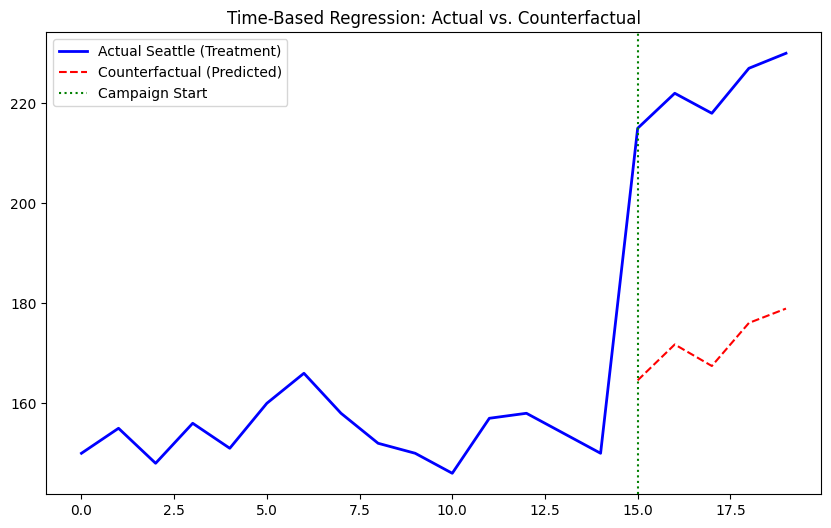

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# ==========================================
# 1. SETUP: Create Dummy Data (The Scenario)
# ==========================================
# Imagine 20 weeks of data.
# Weeks 0-14: Pre-Period (Normal)
# Weeks 15-19: Post-Period (Campaign in Seattle)

data = {
    'Week': range(20),
    'Portland_Sales_Control': [
        100, 102, 98, 105, 100, 108, 110, 105, 102, 100, 98, 104, 106, 102, 100, # Pre (15 weeks)
        110, 115, 112, 118, 120 # Post (5 weeks - Seasonality is going up!)
    ],
    'Seattle_Sales_Treatment': [
        # Pre-Period: Seattle is roughly 1.5x Portland
        150, 155, 148, 156, 151, 160, 166, 158, 152, 150, 146, 157, 158, 154, 150,
        # Post-Period: Seattle gets a "Real Lift" (1.5x Portland + 50 extra orders)
        215, 222, 218, 227, 230
    ]
}

df = pd.DataFrame(data)

# Define the Cutoff
intervention_week = 15

# Split Data
df_pre = df[df['Week'] < intervention_week].copy()
df_post = df[df['Week'] >= intervention_week].copy()

# ==========================================
# 2. TRAINING (The "Learning" Phase)
# ==========================================
# We regress Treatment (Y) on Control (X) using ONLY Pre-period data.
# Logic: "Learn how Seattle behaves as a function of Portland."

model = LinearRegression()
X_pre = df_pre[['Portland_Sales_Control']]
y_pre = df_pre['Seattle_Sales_Treatment']

model.fit(X_pre, y_pre)

# Print the relationship found
print(f"Relationship Found: Seattle ≈ {model.coef_[0]:.2f} * Portland + {model.intercept_:.2f}")
# Expected output: roughly 1.5 * Portland + 0

# ==========================================
# 3. PREDICTION (The "Counterfactual")
# ==========================================
# We use the model to predict what Seattle *should* have sold during the campaign
# based on what Portland actually sold.

X_post = df_post[['Portland_Sales_Control']]

# Predict the Counterfactual
df_post['Counterfactual'] = model.predict(X_post)

# ==========================================
# 4. ANALYSIS (Calculate Lift)
# ==========================================

# Calculate Point Lift (Actual - Counterfactual)
df_post['Point_Lift'] = df_post['Seattle_Sales_Treatment'] - df_post['Counterfactual']

# Calculate Cumulative Lift (Total extra burgers sold)
total_incremental_sales = df_post['Point_Lift'].sum()

print("\n--- Post-Period Analysis ---")
print(df_post[['Week', 'Seattle_Sales_Treatment', 'Counterfactual', 'Point_Lift']])
print(f"\nTotal Incremental Sales Generated: {total_incremental_sales:.2f}")

# ==========================================
# 5. VISUALIZATION (Optional)
# ==========================================
plt.figure(figsize=(10, 6))

# Plot Actuals
plt.plot(df['Week'], df['Seattle_Sales_Treatment'], label='Actual Seattle (Treatment)', color='blue', linewidth=2)

# Plot Counterfactual (Only for Post period)
plt.plot(df_post['Week'], df_post['Counterfactual'], label='Counterfactual (Predicted)', color='red', linestyle='--')

plt.axvline(x=intervention_week, color='green', linestyle=':', label='Campaign Start')
plt.title("Time-Based Regression: Actual vs. Counterfactual")
plt.legend()
plt.show()

In [8]:
pip install pycausalimpact

Note: you may need to restart the kernel to use updated packages.


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/causalimpact/main.py:603: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/causalimpact/main.py:302: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_sig = (mu[0], sig[0])
/Users/barryomatsu/Library/Python/3.12/lib/python/site-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/Users/barryomatsu/Library/Python/3.12/lib/python/site-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to 

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    113.36             3400.69
Prediction (s.d.)         102.91 (1.49)      3087.18 (44.63)
95% CI                    [100.06, 105.89]   [3001.85, 3176.79]

Absolute effect (s.d.)    10.45 (1.49)       313.51 (44.63)
95% CI                    [7.46, 13.29]      [223.9, 398.85]

Relative effect (s.d.)    10.16% (1.45%)     10.16% (1.45%)
95% CI                    [7.25%, 12.92%]    [7.25%, 12.92%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


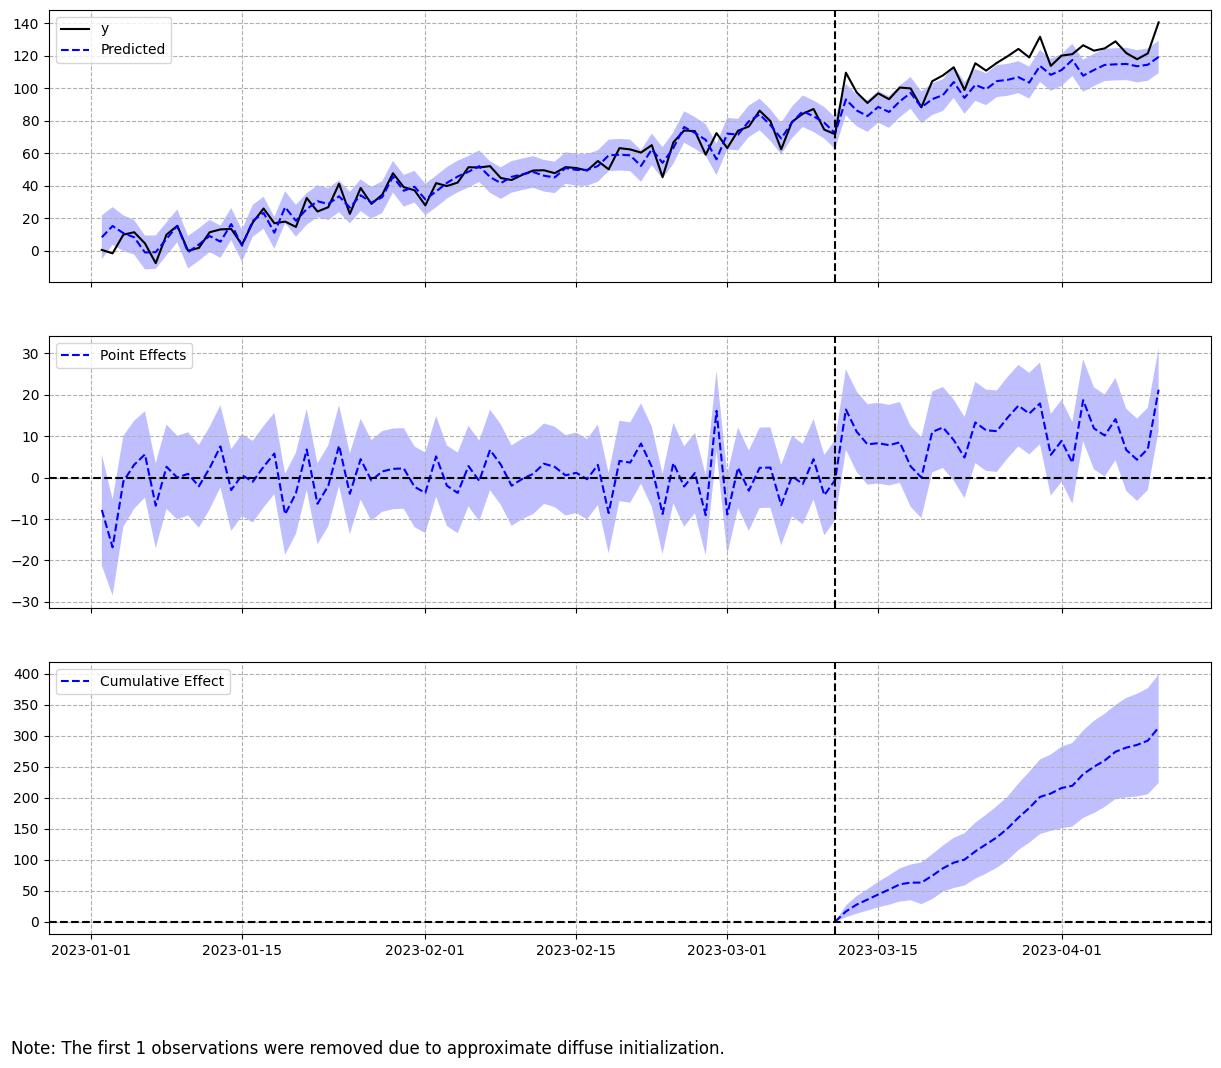

In [9]:
import pandas as pd
import numpy as np
from causalimpact import CausalImpact

# ==========================================
# 1. SETUP: Create Data with a Date Index
# ==========================================
# CausalImpact loves Pandas DateTimes.
# We create 100 days of data.
dates = pd.date_range(start='2023-01-01', periods=100)

# Create a Control Market (e.g., Portland)
# It has some random noise and a trend.
x_control = np.arange(100) + np.random.normal(0, 5, 100)

# Create a Treated Market (e.g., Seattle)
# It is correlated with Control (1.2x) plus noise.
y_treated = 1.2 * x_control + np.random.normal(0, 5, 100)

# INJECT THE LIFT:
# On Day 70, we launch the campaign.
# We add a huge spike of +10 to the treated market.
y_treated[70:] += 10

# Combine into a DataFrame
# Column 0 must be 'y' (Outcome/Treatment), Column 1+ are 'X' (Controls)
data = pd.DataFrame(data={'y': y_treated, 'x': x_control}, index=dates)

# ==========================================
# 2. DEFINE PERIODS
# ==========================================
pre_period = ['2023-01-01', '2023-03-11']   # Days 0 to 69
post_period = ['2023-03-12', '2023-04-10']  # Days 70 to 99

# ==========================================
# 3. RUN THE MODEL
# ==========================================
# This fits a BSTS model on the pre-period and forecasts the counterfactual.
ci = CausalImpact(data, pre_period, post_period)

# ==========================================
# 4. INTERPRET RESULTS
# ==========================================

# A. Print the text summary (The "Analyst Report")
print(ci.summary())

# B. Print the detailed report (The "Deep Dive")
# print(ci.summary(output='report'))

# C. Plot the results (The "Stakeholder Slide")
ci.plot()

In [13]:
x_control

array([ 8.62981326e-01,  3.39335385e-01,  9.51386484e+00,  1.05240788e+01,
        8.58330687e+00,  1.54350620e-01, -4.79888899e-01,  7.26958696e+00,
        1.37325041e+01,  3.20362534e-02,  3.95695220e+00,  8.55520323e+00,
        5.42178434e+00,  1.40372986e+01,  3.01065036e+00,  1.58868031e+01,
        2.01313771e+01,  9.63071517e+00,  2.25625683e+01,  1.59795029e+01,
        2.22723133e+01,  2.59824793e+01,  2.48666934e+01,  2.89552077e+01,
        2.27417572e+01,  2.93359180e+01,  2.52485939e+01,  2.81532179e+01,
        3.87486553e+01,  3.13293705e+01,  3.33474325e+01,  2.68412417e+01,
        3.11163830e+01,  3.53751420e+01,  3.87519489e+01,  4.13811484e+01,
        4.41790886e+01,  3.85625681e+01,  3.51385803e+01,  3.82690907e+01,
        3.96731441e+01,  4.08869020e+01,  3.89057777e+01,  3.79264504e+01,
        4.26786309e+01,  4.16893350e+01,  4.16319797e+01,  4.36668614e+01,
        4.91010307e+01,  4.97693577e+01,  4.92894349e+01,  4.36367696e+01,
        5.19370115e+01,  

In [18]:
y_treated[70:] 

array([109.70909779,  97.57854073,  91.07252435,  96.99339735,
        93.39329625, 100.57910569, 100.03286572,  88.41929811,
       104.44950404, 108.05593444, 113.04761482,  99.05151518,
       115.53653489, 110.98525961, 115.76468837, 119.85071925,
       124.35383402, 119.10981482, 131.82900912, 113.898889  ,
       120.23882406, 121.11630214, 126.59864909, 123.27504612,
       124.67855196, 129.00455837, 121.79801036, 117.99943051,
       121.58109653, 140.6917907 ])

In [20]:
data.head()

,y,x
2023-01-01,9.066105,0.862981
2023-01-02,0.643118,0.339335
2023-01-03,-1.438184,9.513865
2023-01-04,10.054942,10.524079
2023-01-05,11.547703,8.583307


In [34]:
np.random.seed(42)

dates = pd.date_range(start='2023-01-01', periods=100)

control = np.random.normal(100, 10, 100)
treatment = 1.2 * control + np.random.normal(0, 5, 100)

df = pd.DataFrame({'y': treatment, 'x': control}, index=dates)

# ci = CausalImpact(data, ['2023-01-01', '2023-03-11'], ['2023-03-12', '2023-04-10'])

treatment[70:] += 8



In [42]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from causalimpact import CausalImpact

# 1. Generate Data
np.random.seed(42)
dates = pd.date_range('2023-01-01', periods=100)
control = np.random.normal(100, 10, 100)
# Treatment is 1.2x control + noise
treatment = 1.2 * control + np.random.normal(0, 5, 100)

# Inject a +8 unit lift starting at Day 70
treatment[70:] += 8

df = pd.DataFrame({'y': treatment, 'x': control}, index=dates)

In [49]:
df_ols.head()

,y,x,is_post,diff
2023-01-01,118.883716,104.967142,0,-7.076854
2023-01-02,116.237602,98.617357,0,-2.103227
2023-01-03,126.058690,106.476885,0,-1.713573
2023-01-04,134.264972,115.230299,0,-4.011386
2023-01-05,116.383731,97.658466,0,-0.806429


In [43]:
import statsmodels.formula.api as smf

# Reshape for OLS
df_ols = df.copy()
df_ols['is_post'] = (df_ols.index >= '2023-03-12').astype(int)
# In this specific simplified case (1 control, 1 treatment), 
# we calculate the 'diff' as our target.
df_ols['diff'] = df_ols['y'] - (1.2 * df_ols['x']) # Simplified DiD logic

model = smf.ols('diff ~ is_post', data=df_ols).fit()
print(f"DiD Lift Estimate: {model.params['is_post']:.2f}")
print(f"DiD P-value: {model.pvalues['is_post']:.4f}")

DiD Lift Estimate: 7.70
DiD P-value: 0.0000


In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   diff   R-squared:                       0.356
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     54.27
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           5.53e-11
Time:                        15:42:25   Log-Likelihood:                -297.55
No. Observations:                 100   AIC:                             599.1
Df Residuals:                      98   BIC:                             604.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2010      0.573      0.351      0.726      -0.935       1.337
is_post        7.7016      1.045      7.367      0.000       5.627       9.776
==============================================================================
Omnibus:                        2.581   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.275   Jarque-Bera (JB):                2.324
Skew:                           0.373   Prob(JB):                        0.313
Kurtosis:                       2.987   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
pre_period = ['2023-01-01', '2023-03-11']
post_period = ['2023-03-12', '2023-04-10']

ci = CausalImpact(df, pre_period, post_period)
print(ci.summary())

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/causalimpact/main.py:603: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if not data.applymap(np.isreal).values.all():
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/causalimpact/main.py:302: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.mu_sig = (mu[0], sig[0])
/Users/barryomatsu/Library/Python/3.12/lib/python/site-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)
/Users/barryomatsu/Library/Python/3.12/lib/python/site-packages/statsmodels/base/optimizer.py:21: FutureWarning: Keyword arguments have been passed to 

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    127.52             3825.62
Prediction (s.d.)         119.92 (1.24)      3597.62 (37.29)
95% CI                    [117.56, 122.43]   [3526.85, 3673.02]

Absolute effect (s.d.)    7.6 (1.24)         228.0 (37.29)
95% CI                    [5.09, 9.96]       [152.6, 298.77]

Relative effect (s.d.)    6.34% (1.04%)      6.34% (1.04%)
95% CI                    [4.24%, 8.3%]      [4.24%, 8.3%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


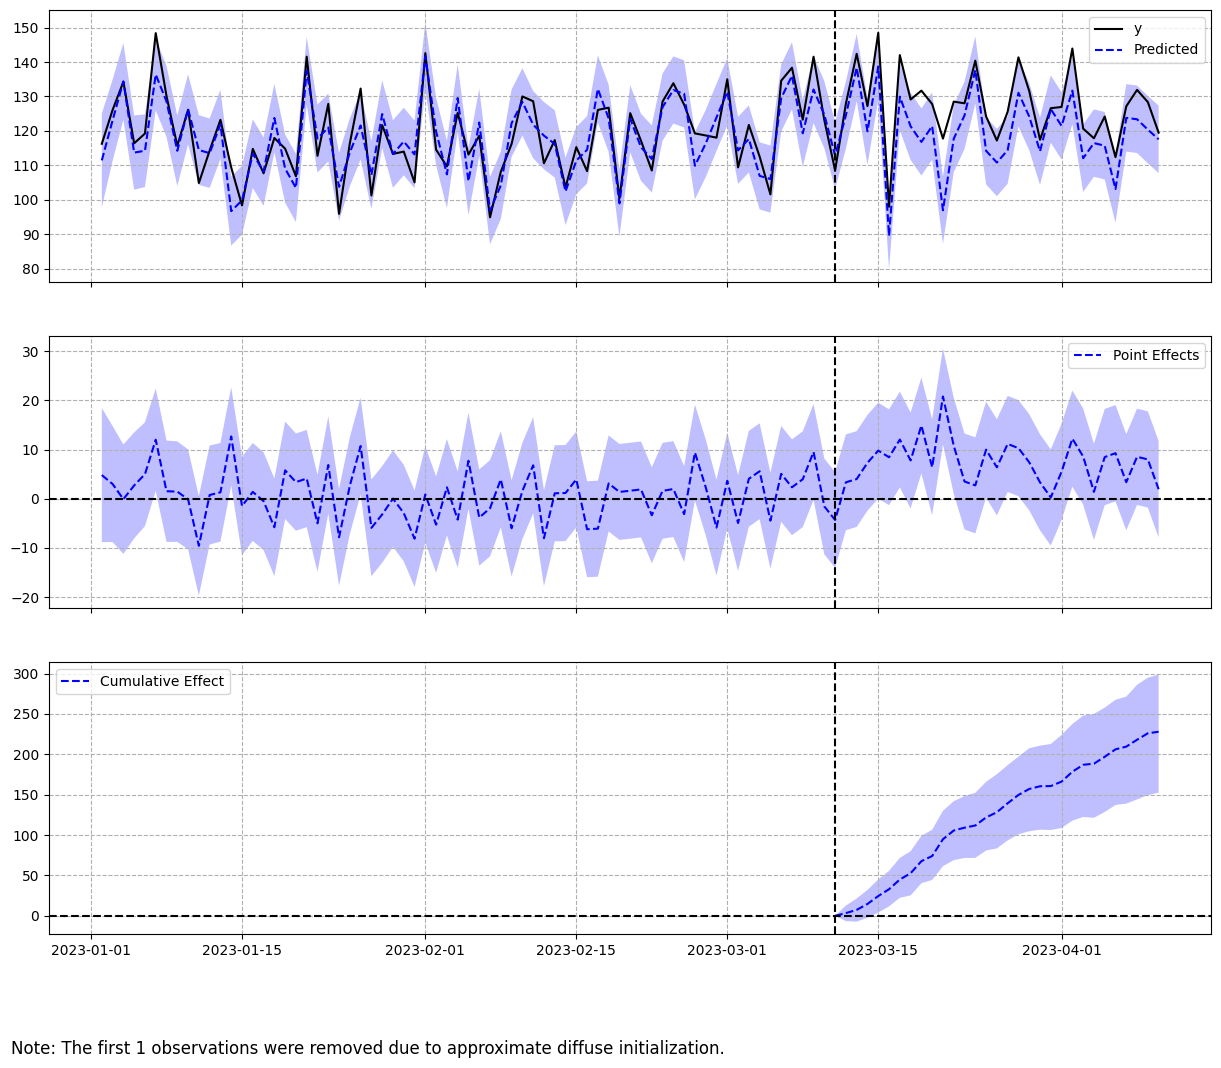

In [46]:
ci.plot()

In [51]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
# This is the specific import needed for Heckman
from statsmodels.regression.selectionmodel import SelectionModel

# ... [Use the same data simulation from the previous block] ...

# 4. Fit the Heckman Selection Model correctly
# Outcome variables (Spend)
endog = df['spend'].dropna()

# Outcome regressors (Constant + Strategy Score + Tenure)
exog = df.loc[df['answered_survey'] == 1, ['const', 'strategy_score', 'tenure']]

# Selection regressors (Constant + Tenure + Reminders + Baseline Spend)
exog_select = df[['const', 'tenure', 'reminders', 'baseline_spend']]

# Initialize and fit the model
# In statsmodels, SelectionModel implements the Heckman two-step or MLE
model = SelectionModel(endog, exog, exog_select)
results = model.fit()

print(results.summary())

ModuleNotFoundError: No module named 'statsmodels.regression.selectionmodel'

In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.stats import norm

# 1. [Use the same simulated 'df' from our previous conversation]

# 2. STEP 1: The Selection Equation (Probit)
# We model whether they answered the survey
selection_cols = ['const', 'tenure', 'reminders', 'baseline_spend']
probit_model = sm.Probit(df['answered_survey'], df[selection_cols]).fit()

# Calculate the Inverse Mills Ratio (IMR)
# IMR = pdf(selection_index) / cdf(selection_index)
selection_index = probit_model.predict(df[selection_cols])
# Convert probability to z-score (inverse CDF)
z_score = norm.ppf(selection_index)

df['IMR'] = norm.pdf(z_score) / norm.cdf(z_score)

# 3. STEP 2: The Outcome Equation (OLS)
# We only run this on the people who answered the survey (the 2%)
# We include the IMR as a regressor to 'soak up' the bias
observed_df = df[df['answered_survey'] == 1].copy()

outcome_cols = ['const', 'strategy_score', 'tenure', 'IMR']
final_model = sm.OLS(observed_df['spend'], observed_df[outcome_cols]).fit()

print(final_model.summary())

Optimization terminated successfully.
         Current function value: 0.598636
         Iterations 5
                            OLS Regression Results                            
Dep. Variable:                  spend   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.444
Method:                 Least Squares   F-statistic:                     155.8
Date:                Mon, 22 Dec 2025   Prob (F-statistic):           5.60e-74
Time:                        13:58:23   Log-Likelihood:                -4405.3
No. Observations:                 582   AIC:                             8819.
Df Residuals:                     578   BIC:                             8836.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [57]:
np.random.binomial(3, 0.5,100)

array([1, 2, 0, 0, 2, 2, 2, 1, 2, 2, 2, 1, 3, 2, 3, 2, 2, 0, 1, 2, 1, 0,
       1, 1, 3, 2, 1, 0, 2, 2, 3, 2, 1, 2, 3, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       0, 1, 2, 0, 1, 3, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 3, 2,
       0, 1, 3, 2, 2, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 0, 2,
       3, 1, 2, 3, 1, 2, 1, 1, 2, 3, 2, 1])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler

# 1. Simulate the Data
np.random.seed(42)
n = 2000

# Confounders: Tenure and Baseline Spend
tenure = np.random.randint(1, 60, n)
baseline_spend = np.random.normal(5000, 1500, n)

# Treatment: Strategic Rep Advice (Depends on confounders)
prob_treatment = 1 / (1 + np.exp(-(-3 + 0.04*tenure + 0.0003*baseline_spend)))
treatment = np.random.binomial(1, prob_treatment)

# Outcome: Revenue (Actual Treatment Effect = 600)
revenue = 1000 + 600*treatment + 15*tenure + 0.12*baseline_spend + np.random.normal(0, 250, n)

df = pd.DataFrame({'T': treatment, 'tenure': tenure, 'spend': baseline_spend, 'Y': revenue})
X = df[['tenure', 'spend']]

# 2. STEP 1: Propensity Model (Weighting Component)
prop_model = LogisticRegression().fit(X, df['T'])
ps = prop_model.predict_proba(X)[:, 1]

# 3. STEP 2: Outcome Model (Regression Component)
# We train two separate models to predict Y | X for treated and control
model_treated = LinearRegression().fit(X[df['T'] == 1], df.loc[df['T'] == 1, 'Y'])
model_control = LinearRegression().fit(X[df['T'] == 0], df.loc[df['T'] == 0, 'Y'])

mu_1 = model_treated.predict(X) # Predicted outcome if everyone was treated
mu_0 = model_control.predict(X) # Predicted outcome if no one was treated

# 4. STEP 3: Doubly Robust Calculation
# This formula combines the weighted residuals with the predicted outcomes
dr_1 = (df['T'] * df['Y'] / ps) - ((df['T'] - ps) / ps * mu_1)
dr_0 = ((1 - df['T']) * df['Y'] / (1 - ps)) + ((df['T'] - ps) / (1 - ps) * mu_0)

dr_ate = np.mean(dr_1 - dr_0)

print(f"Doubly Robust Estimated ATE: {dr_ate:.2f}")

Doubly Robust Estimated ATE: 626.66


In [62]:
treatment

array([1, 0, 0, ..., 1, 1, 1], shape=(2000,))

In [64]:
pip install causalml

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 4.8 MB/s  0:00:00 eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 13.6 MB/s  0:00:01 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 555.5/555.5 kB 11.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 50.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.2/37.2 MB 43.5 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 72.9 MB/s  0:00:00
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24636 sha256=41736e8b95265fb8100e3ef1ef4d942e4a153be5ef7539e94c61896e2daac3f9
  Stored in directory: /Users/barryomatsu/Library/Caches/pip/wheels/77/54/7c/c8077b6151c819495492300386cf9b151a954259d1a658c63b
Successfully built

In [65]:
from causalml.inference.meta import XLearner
from xgboost import XGBRegressor

# Initialize the learner with a powerful base model like XGBoost
xl = XLearner(models=XGBRegressor())

# X = features (including 'vertical'), T = treatment, y = outcome
# This returns the specific 'predicted lift' for every single advertiser
cate_estimates = xl.estimate_ate(X, T, y)
df['predicted_lift'] = xl.fit_predict(X, T, y)

ModuleNotFoundError: No module named 'scipy.cluster'

In [66]:
import numpy as np
import pandas as pd

# 1. Simulate the Dataset
np.random.seed(42)
n = 10000

# Pre-experiment spend (Covariate X)
pre_spend = np.random.normal(5000, 2000, n)
pre_spend = np.maximum(pre_spend, 0) # No negative spend

# Random Treatment Assignment (50/50)
treatment = np.random.binomial(1, 0.5, n)

# The 'True' Lift we want to detect is $150
true_lift = 150

# Post-experiment spend (Outcome Y)
# High correlation with pre_spend (0.9) + treatment lift + random noise
noise = np.random.normal(0, 1000, n)
post_spend = pre_spend + (treatment * true_lift) + noise
post_spend = np.maximum(post_spend, 0)

df = pd.DataFrame({
    'treatment': treatment,
    'pre_spend': pre_spend,
    'post_spend': post_spend
})

# 2. CUPED STEP 1: Calculate Theta
# Theta = Cov(Pre, Post) / Var(Pre)
cov_xy = df[['pre_spend', 'post_spend']].cov().iloc[0, 1]
var_x = df['pre_spend'].var()
theta = cov_xy / var_x

# 3. CUPED STEP 2: Adjust the Metric
# Y_cuped = Y_actual - theta * (X_actual - X_mean)
mean_pre = df['pre_spend'].mean()
df['cuped_spend'] = df['post_spend'] - theta * (df['pre_spend'] - mean_pre)

# 4. Compare the Results
def analyze(data, metric):
    ctrl = data[data['treatment'] == 0][metric]
    test = data[data['treatment'] == 1][metric]
    lift = test.mean() - ctrl.mean()
    se = np.sqrt(test.var()/len(test) + ctrl.var()/len(ctrl))
    return f"Lift: {lift:.2f} | Std Error: {se:.2f} | 95% CI: [{lift - 1.96*se:.2f}, {lift + 1.96*se:.2f}]"

print(f"Raw Analysis:   {analyze(df, 'post_spend')}")
print(f"CUPED Analysis: {analyze(df, 'cuped_spend')}")

Raw Analysis:   Lift: 137.05 | Std Error: 44.37 | 95% CI: [50.08, 224.03]
CUPED Analysis: Lift: 129.11 | Std Error: 19.67 | 95% CI: [90.56, 167.66]


In [68]:
df[['pre_spend', 'post_spend']].cov().iloc[0,1]

np.float64(3966292.069361232)

In [69]:
import pandas as pd
from causalimpact import CausalImpact

# 1. Create a dummy dataset
# 'y' = LA Spend (Treated)
# 'x1', 'x2' = SF and Seattle Spend (Controls)
data = pd.read_csv('market_spend.csv', index_col='date')

# Define the intervention period
# Pre-period: Jan 1 to June 30
# Post-period: July 1 to July 31 (Pilot Launch)
pre_period = ['2025-01-01', '2025-06-30']
post_period = ['2025-07-01', '2025-07-31']

FileNotFoundError: [Errno 2] No such file or directory: 'market_spend.csv'

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def check_and_trim_support(df, ps_col='ps', treatment_col='T', threshold=0.05):
    """
    1. Visualizes Propensity Score overlap
    2. Trims the data to ensure Common Support
    """
    # --- STEP 1: Visualization ---
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[df[treatment_col] == 1][ps_col], label='Treated', fill=True)
    sns.kdeplot(df[df[treatment_col] == 0][ps_col], label='Control', fill=True)
    plt.title('Propensity Score Distribution (Overlap Check)')
    plt.xlabel('Probability of Treatment (Propensity Score)')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

    # --- STEP 2: Trimming ---
    # We remove cases where the probability is too close to 0 or 1.
    # This prevents weights (1/ps) from becoming infinite or massive.
    
    initial_count = len(df)
    trimmed_df = df[(df[ps_col] > threshold) & (df[ps_col] < (1 - threshold))]
    
    dropped_count = initial_count - len(trimmed_df)
    print(f"Dropped {dropped_count} rows ({dropped_count/initial_count:.2%}) due to lack of common support.")
    
    return trimmed_df

# Usage
df_final = check_and_trim_support(df)

KeyError: 'T'

<Figure size 1000x600 with 0 Axes>

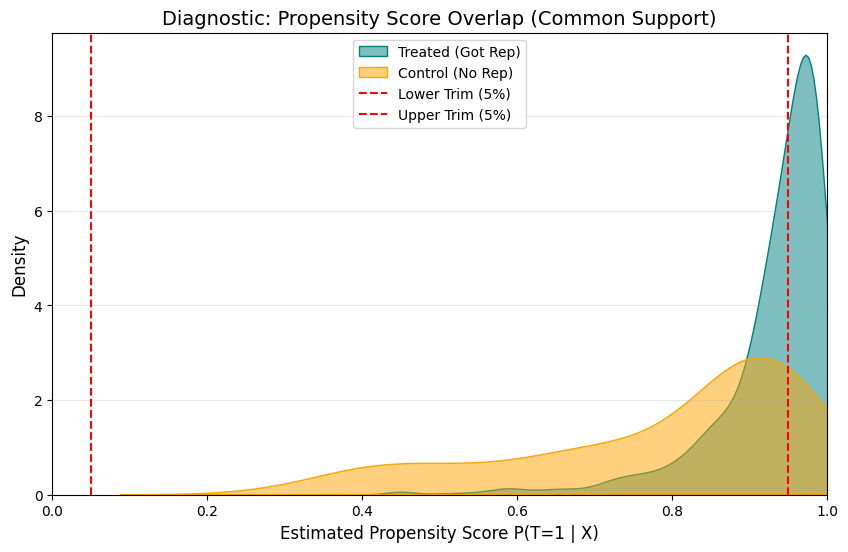

Original size: 1000
Trimmed size: 497


In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 1. GENERATE DUMMY DATA (For visualization purposes)
np.random.seed(42)
n = 1000
# Features: Tenure (X1) and Spend (X2)
x1 = np.random.normal(5, 2, n)
x2 = np.random.normal(5000, 2000, n)
# True Propensity (Logic: Bigger spenders are more likely to get a Rep)
logit_ps = -2 + 0.5 * x1 + 0.0005 * x2
ps_true = 1 / (1 + np.exp(-logit_ps))
# Treatment Assignment
t = np.random.binomial(1, ps_true)
# Outcome (Revenue)
y = 1000 + 5 * x1 + 0.1 * x2 + 500 * t + np.random.normal(0, 100, n)

df = pd.DataFrame({'X1': x1, 'X2': x2, 'T': t, 'Y': y})

# 2. TRAIN PROPENSITY MODEL
ps_model = LogisticRegression()
ps_model.fit(df[['X1', 'X2']], df['T'])
df['ps'] = ps_model.predict_proba(df[['X1', 'X2']])[:, 1]

# 3. VISUALIZE DISTRIBUTIONS
def plot_common_support(df):
    plt.figure(figsize=(10, 6))
    
    # Plot Treated (T=1)
    sns.kdeplot(data=df[df['T'] == 1], x='ps', fill=True, 
                color="teal", label='Treated (Got Rep)', alpha=0.5)
    
    # Plot Control (T=0)
    sns.kdeplot(data=df[df['T'] == 0], x='ps', fill=True, 
                color="orange", label='Control (No Rep)', alpha=0.5)
    
    # Add labels for Senior DS level presentation
    plt.axvline(0.05, color='red', linestyle='--', label='Lower Trim (5%)')
    plt.axvline(0.95, color='red', linestyle='--', label='Upper Trim (5%)')
    
    plt.title('Diagnostic: Propensity Score Overlap (Common Support)', fontsize=14)
    plt.xlabel('Estimated Propensity Score P(T=1 | X)', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.xlim(0, 1)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.show()

plot_common_support(df)

# 4. PERFORM THE TRIM
# This ensures we aren't extrapolating into regions where we have no data
trimmed_df = df[(df['ps'] > 0.05) & (df['ps'] < 0.95)]
print(f"Original size: {len(df)}")
print(f"Trimmed size: {len(trimmed_df)}")

In [2]:
import numpy as np

# Scenario: Assigning a 'Priority' label based on spend
spend = np.array([500, 1200, 800, 2500, 300])
# If spend > 1000, 'High', else 'Low'
priority = np.where(spend > 1000, 'High', 'Low')
print(priority) # ['Low' 'High' 'Low' 'High' 'Low']

['Low' 'High' 'Low' 'High' 'Low']


In [4]:
np.where(spend < 1000, False, True)

array([False,  True, False,  True, False])

In [5]:
prices = np.linspace(10,100,10)

In [6]:
prices

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [10]:
monthly_data = np.arange(1,13)

In [ ]:
quartelry_view = monthly_data.reshape(4,3)

In [ ]:
quartelry_view

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [15]:
quartelry_view.sum(axis=1)



array([ 6, 15, 24, 33])

In [16]:
import pandas as pd

In [20]:
import pandas as pd

df = pd.DataFrame({
    'Advertiser': ['A', 'B', 'C'],
    'Spend': [100, 200, 300],
    'Vertical': ['Retail', 'Tech', 'Finance'],
    'Lift': [1.2, 1.5, 1.1],
    'Spend': [100, 200, 300],
    'Account_Name': ['Acme', 'Beta','Google']
}, index=['ID_101', 'ID_102', 'ID_103'])

# .loc is for labels (use for specific Advertiser IDs)
target_client = df.loc['ID_102']

# .iloc is for position (use for 'top 10 rows')
top_performers = df.iloc[0:10]

In [21]:
df.head()

,Advertiser,Spend,Vertical,Lift,Account_Name
ID_101,A,100,Retail,1.2,Acme
ID_102,B,200,Tech,1.5,Beta
ID_103,C,300,Finance,1.1,Google


In [9]:
top_performers

,Advertiser,Spend
ID_101,A,100
ID_102,B,200
ID_103,C,300


In [10]:

df.iloc[0:1,:1]

,Advertiser
ID_101,A


In [17]:
# Scenario: Compare average lift by Industry
results = df.groupby('Vertical').agg({
    'Lift': 'mean',
    'Spend': ['sum', 'max']
})

In [18]:
results

Lift Spend     
         mean   sum  max
Vertical                
Finance   1.1   300  300
Retail    1.2   100  100
Tech      1.5   200  200

In [22]:
# Flag advertisers that contain 'Google' in their name (Internal accounts)
df['is_internal'] = df['Account_Name'].apply(lambda x: 1 if 'google' in x.lower() else 0)

In [23]:
df.head()

,Advertiser,Spend,Vertical,Lift,Account_Name,is_internal
ID_101,A,100,Retail,1.2,Acme,0
ID_102,B,200,Tech,1.5,Beta,0
ID_103,C,300,Finance,1.1,Google,1


In [24]:
df['Account_Name']

ID_101      Acme
ID_102      Beta
ID_103    Google
Name: Account_Name, dtype: object